# sms spam classifier.

In [1]:
#importing the dependencies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

import seaborn as sns

In [4]:
pip install chardet

In [2]:
#when the file encoding is other than 'utf-8'. So, we need to detect the correct encoding.

import chardet

# Detect file encoding
with open('spam.csv', 'rb') as f:
    
    #result is a dictionary.Contains the encoding and confidence level.
    result = chardet.detect(f.read())
encoding = result['encoding']

# Read CSV file with detected encoding
df = pd.read_csv('spam.csv', encoding=encoding)

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2591,ham,Still work going on:)it is very small house.,NaN,NaN,NaN
2740,ham,Nothing. Can...,NaN,NaN,NaN
2721,ham,I'm working technical support :)voice process.,NaN,NaN,NaN
5030,ham,Hey... Very inconvenient for your sis a not huh?,NaN,NaN,NaN
3711,ham,Wat u doing there?,NaN,NaN,NaN


In [3]:
#shape of dataframe (5572, 5)

df.shape

(5572, 5)

In [4]:
#pipeline.

#1.Data cleaning.
#2.EDA.
#3.Text preprocesing
#4.Model building.
#5.Evaluation
#6.Improvment
#7.website
#8.Deploy

## 1.Data Cleaning

In [5]:
#missing values in column.
df.notnull().sum()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [7]:
df.sample(5)

,v1,v2
2433,ham,Indians r poor but India is not a poor country...
2819,spam,INTERFLORA - åÒIt's not too late to order Inte...
146,spam,FreeMsg Why haven't you replied to my text? I'...
4512,spam,Money i have won wining number 946 wot do i do...
567,ham,"So anyways, you can just go to your gym or wha..."


In [8]:
#duplicate rows.
df.duplicated().sum()

403

In [9]:
#dropping the duplicate values.
#new shape of df(5169, 2)

df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
#renaming the columns name.
df.rename(columns={'v1':'label' , 'v2':'text'}, inplace=True)
df.sample(5)

,label,text
4968,ham,I will cme i want to go to hos 2morow. After t...
4166,ham,Are you at work right now ?
2812,ham,Enjoy the showers of possessiveness poured on ...
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
3545,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...


In [12]:
#label encoding the label column ham->0, spam->1.

encoder=LabelEncoder()

df['label']=encoder.fit_transform(df['label'])
df['label'].unique

<bound method Series.unique of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int32>

## 2. EDA

In [13]:
#prints the number of hams and spams.
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

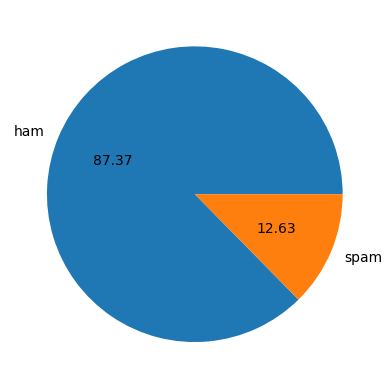

In [14]:
plt.pie(df['label'].value_counts(), labels=['ham' , 'spam'] , autopct='%0.2f')
plt.show()

#data is imbalanced

In [15]:
!pip install nltk

You should consider upgrading via the 'C:\Users\USER\ML projects\sms spam classifier\myvenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [17]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#adding a new column contains the length of the each text.
df['len_characters']=df['text'].apply(len)

In [17]:
#adding a new column contains the number of words of each text.
df['len_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
#adding a new column contains the number of sentences of each text.
df['len_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,label,text,len_characters,len_words,len_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#describe of ham messages
df[df['label']==0][['len_characters' , 'len_words' , 'len_sentence']].describe()

,len_characters,len_words,len_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
#describe of spam messages.
df[df['label']==1][['len_characters' , 'len_words' , 'len_sentence']].describe()

,len_characters,len_words,len_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='len_characters', ylabel='Count'>

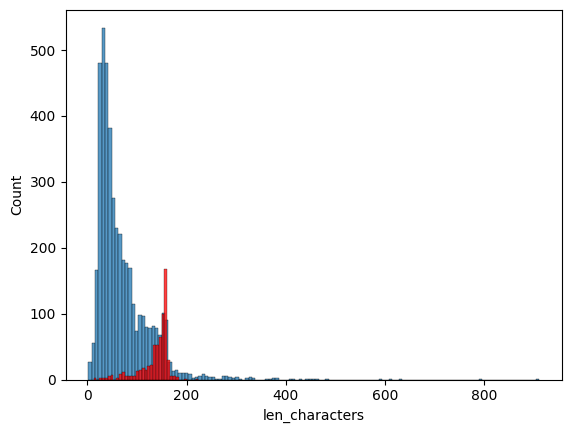

In [22]:
sns.histplot(df[df['label']==0]['len_characters'])
sns.histplot(df[df['label']==1]['len_characters'], color='red')

<Axes: >

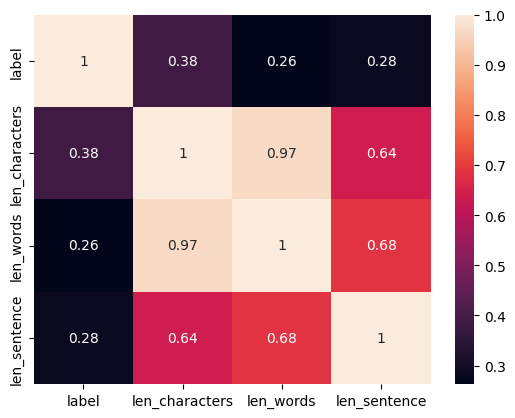

In [23]:
sns.heatmap(df.corr(), annot=True)

## 3.Data preprocessing

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
def text_preprocessing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    temp=[]
    for i in text:
        if i.isalnum():
            temp.append(i)
        
    text=temp[:]
    temp.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
        
    text=temp[:]
    temp.clear()
    ps=PorterStemmer()
    
    for i in text:
        temp.append(ps.stem(i))
    return " ".join(temp)

In [25]:
text_preprocessing(df['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [26]:
 df['transformed_text']=df['text'].apply(text_preprocessing)

In [27]:
df.head()

,label,text,len_characters,len_words,len_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


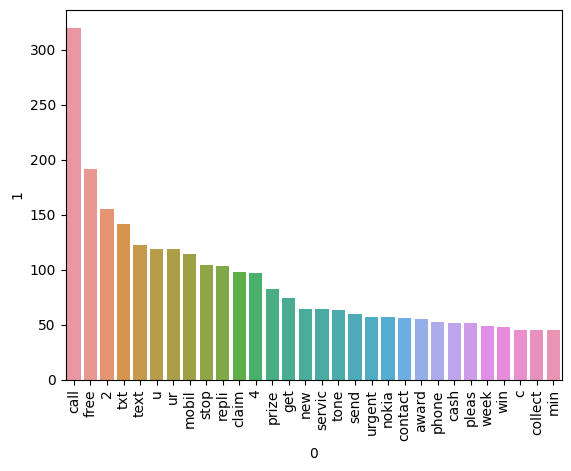

In [28]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


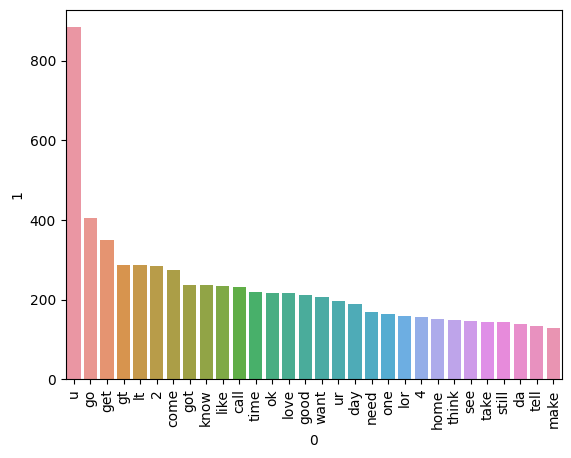

In [29]:
ham_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
pip install xgboost

  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
# cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

X.shape

(5169, 2000)

In [32]:
Y=df['label'].values
Y.shape

(5169,)

In [33]:
X_train ,X_test , Y_train, Y_test = train_test_split(X , Y , test_size=0.3)

print(f'Training size shape: {X_train.shape , Y_train.shape}')
print(f'Test size shape:  {X_test.shape , Y_test.shape}')

Training size shape: ((3618, 2000), (3618,))
Test size shape:  ((1551, 2000), (1551,))


In [34]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [35]:
gnb.fit(X_train ,Y_train)
test_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test , test_pred1))
print(confusion_matrix(Y_test , test_pred1))
print(precision_score(Y_test, test_pred1))

0.8478401031592521
[[1151  202]
 [  34  164]]
0.44808743169398907


In [36]:
mnb.fit(X_train ,Y_train)
test_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test , test_pred2))
print(confusion_matrix(Y_test , test_pred2))
print(precision_score(Y_test, test_pred2))

0.9742101869761445
[[1353    0]
 [  40  158]]
1.0


In [37]:
bnb.fit(X_train ,Y_train)
test_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test , test_pred3))
print(confusion_matrix(Y_test , test_pred3))
print(precision_score(Y_test, test_pred3))

0.9806576402321083
[[1349    4]
 [  26  172]]
0.9772727272727273


### Conclusion: 
from the above naive bayes we will select the tfidf vectorizer and multinomial naive bayes along with we will evaluate other models also.

In [38]:
lr=LogisticRegression()
mnb2=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgbc=XGBClassifier(n_estimators=50 , random_state=2)

In [39]:
clfs={
    'Logistic Regression':lr,
    'Multinomial Naive Bayes':mnb2,
    'Decision tree classifier':dtc,
    'K neighbours Classifier':knc,
    'Random forest classifier':rfc,
    'Gradient Boosting Classifier':gbc,
    'Xg boost classifier':xgbc
}

In [40]:
def train_model(cls , X_train , Y_train, X_test , Y_test):
    cls.fit(X_train, Y_train)
    test_pred=cls.predict(X_test)
    accuracy=accuracy_score(Y_test , test_pred)
    precision=precision_score(Y_test , test_pred)
    return accuracy , precision

In [41]:
accuracy_scores=[]
precision_scores=[]

for name , cls in clfs.items():
    accuracy , precision=train_model(cls , X_train ,Y_train , X_test , Y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    
    print('For model : ' , name)
    print('model accuracy: ' , accuracy)
    print('model precision: ', precision)

For model :  Logistic Regression
model accuracy:  0.9587362991618311
model precision:  0.9855072463768116
For model :  Multinomial Naive Bayes
model accuracy:  0.9742101869761445
model precision:  1.0
For model :  Decision tree classifier
model accuracy:  0.938749194068343
model precision:  0.8759124087591241


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For model :  K neighbours Classifier
model accuracy:  0.9097356544165055
model precision:  1.0
For model :  Random forest classifier
model accuracy:  0.9754996776273372
model precision:  0.9938271604938271
For model :  Gradient Boosting Classifier
model accuracy:  0.9484203739522888
model precision:  0.8881578947368421
For model :  Xg boost classifier
model accuracy:  0.9722759509993553
model precision:  0.9640718562874252


In [42]:
#here values sorted according to the precision scores. Because , we want to predict the spam messages accurately and data is imbalanced(no. of ham>>>spam).
#precision score which gives TP among the predicted 1's.

performance_df=pd.DataFrame({'Algorithm':clfs.keys(), 'accuracy':accuracy_scores , 'precision':precision_scores}).sort_values(by='precision' , ascending=False)

performance_df

,Algorithm,accuracy,precision
1,Multinomial Naive Bayes,0.974210,1.000000
3,K neighbours Classifier,0.909736,1.000000
4,Random forest classifier,0.975500,0.993827
0,Logistic Regression,0.958736,0.985507
6,Xg boost classifier,0.972276,0.964072
5,Gradient Boosting Classifier,0.948420,0.888158
2,Decision tree classifier,0.938749,0.875912


### Conclusion:
From the above models Naive bayes performed well compared to all the other models. So, we will choose the Multinomial Naive Bayes and will try to improve the accuracy of the using the hyperparameter tuning.

## 6.Improvement(Hyperparameter Tuning)

In [43]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}

In [47]:
grid_search=GridSearchCV(mnb ,param_grid , cv=5 , scoring='precision')
grid_search.fit(X_train, Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True, False]},
             scoring='precision')

In [49]:
best_params=grid_search.best_params_

print(best_params)

{'alpha': 1.0, 'fit_prior': True}


In [53]:
best_estimator=grid_search.best_estimator_
test_pred4=best_estimator.predict(X_test)

accuracy=accuracy_score(Y_test, test_pred4)
print(accuracy)

0.9742101869761445


### Conclusion:
after the hyperparameter tuning also from the best parameters we can get an accuracy score of 0.9742101869761445.

In [57]:
import pickle

pickle.dump(tfidf ,open('tfidf_vectorizer.pkl' , 'wb'))
pickle.dump(mnb ,  open('model.pkl' , 'wb'))
pickle.dump(text_preprocessing , open('text_preprocess.pkl' , 'wb'))